## Overview
We've spent a lot of time discussing how to do inferential statistics on numerical data that is of a ratio, interval, or ordinal scale. Now let's talk about making inferences from nominal, that is, categorical data. A popular type of test statistic to calculate for such data is called chi square. In this notebook, we will take a look at two different, but related, chi square tests. The first is called the chi-square goodness-of-fit test and is used to test if a sample of nominal data matches expectations or a population. The second is called the chi-square test for homogeneity and tests to see if frequency tables are distributed equally across different populations. This second test can also be applied to see if categorical variables within the same population are independent or not. In this formulation it is called the chi-square test for independence. 

After this notebook you will know:
* how to construct frequency tables for nominal/categorical data.
* how to do a chi-square goodness-of-fit test.
* how to do a chi-quare test for homogeneity. 

Note: A chi-square test may not be valid if more than 20% of the cells in your contingency table have expected values less than 5.

### About the Data
Name: ufo.csv

Title: UFO Sightings Dataset

Source: www.uforesearchdb.com

Description: UFO sightings in the US (3437 events). Date, Shape, Location, State, Country, and Source. <br>
Variables/Labels <br>
Event.Date <br>
Shape<br>
Location<br>
State<br>
Country<br>
Source (NUFORC = Nationaol UFO Reporting Center, MUFON = Mutual UFO Network)<br>
USA (1=USA, 0=Not USA)<br>

The following cell will import the UFO data into a pandas dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/ufo.csv"
ufo = pd.read_csv(url)

In [2]:
# let's peak at the data.
print(ufo.shape)
ufo.head(5)

(3646, 7)


,Event.Date,Shape,Location,State,Country,Source,USA
0,6/18/2016,Boomerang/V-Shaped,South Barrington,IL,USA,NUFORC,1
1,6/17/2016,Boomerang/V-Shaped,Kuna,ID,USA,NUFORC,1
2,5/30/2016,Boomerang/V-Shaped,Lake Stevens,WA,USA,NUFORC,1
3,5/27/2016,Boomerang/V-Shaped,Gerber,CA,USA,NUFORC,1
4,5/24/2016,Boomerang/V-Shaped,Camdenton,MO,USA,NUFORC,1


### Constructing Frequency Tables and Contingency Tables

In a goodnees-of-fit chi-square test one compares the frequncy of various categories to an expected freuency based on some assumption about the population or actual population frequencies. Below we will compare the frequency of six different categories of UFO shape in CA to the expected frequencies of these UFO shapes estimated from the entire data set.

In a chi-square test for independence or homogeneity one constructs a contingency table with two or more rows corresponding to different sub-groups and columns corresponding to different values of a categorical/nominal variable. The test assesses whether or not the distribution of frequencies is independent of the sub-group designation. Below we will compare the frequency of six different categories of UFO shape in CA to the frequency of these same six shapes in CA.

In [4]:
# let's find the frequency of the various shapes
import collections
ufo_shape_counts = collections.Counter(ufo['Shape'])
print('UFO shape counts:')
print(ufo_shape_counts)

# this is the total of all shape counts
ufo_shape_counts_sum = sum(ufo_shape_counts.values())
print('Total UFO count:', ufo_shape_counts_sum)

# let's find the five most common shapes
ufo_common_shape_counts = dict(ufo_shape_counts.most_common(5))
print('Most common shapes:', ufo_common_shape_counts)

# and just the names of these shapes without the counts
ufo_common_shape_keys = list(ufo_common_shape_counts.keys())
print(ufo_common_shape_keys)

UFO shape counts:
Counter({'Lights Only ': 1023, 'Circle ': 451, 'Orb/Sphere ': 347, 'Triangle ': 336, 'Fireball ': 294, 'Unknown ': 257, 'Other ': 239, 'Disk ': 178, 'Cigar/Cylinder ': 138, 'Oval ': 129, 'Rectangle ': 68, 'Diamond ': 57, 'Boomerang/V-Shaped ': 38, 'Teardrop ': 36, 'Egg ': 19, 'Cone ': 17, 'Cross ': 14, 'Pyramid ': 2, 'Square ': 1, 'Missile/Rocket ': 1, 'Sphere ': 1})
Total UFO count: 3646
Most common shapes: {'Lights Only ': 1023, 'Orb/Sphere ': 347, 'Circle ': 451, 'Fireball ': 294, 'Triangle ': 336}
['Lights Only ', 'Orb/Sphere ', 'Circle ', 'Fireball ', 'Triangle ']


In [5]:
# let's get only the UFO data for California and Texas
ufos_by_state = ufo.groupby('State')
ufo_ca = ufos_by_state.get_group('CA ')
ufo_tx = ufos_by_state.get_group('TX ')

In [6]:
# now let's construct frequency tables (as dictionaries) for the most common UFO shapes in CA and TX
ufo_ca_shape_counts = collections.Counter(ufo_ca['Shape'])
ufo_ca_shape_counts_sum = sum(ufo_ca_shape_counts.values())

ufo_tx_shape_counts = collections.Counter(ufo_tx['Shape'])
ufo_tx_shape_counts_sum = sum(ufo_tx_shape_counts.values())

ufo_ca_common_shape_counts = dict([(key, ufo_ca_shape_counts[key]) for key in ufo_common_shape_keys])
print('CA:', ufo_ca_common_shape_counts)

ufo_tx_common_shape_counts = dict([(key, ufo_tx_shape_counts[key]) for key in ufo_common_shape_keys])
print('TX:', ufo_tx_common_shape_counts)

CA: {'Lights Only ': 92, 'Orb/Sphere ': 32, 'Circle ': 35, 'Triangle ': 25, 'Fireball ': 50}
TX: {'Lights Only ': 26, 'Orb/Sphere ': 10, 'Circle ': 9, 'Triangle ': 10, 'Fireball ': 6}


In [7]:
# and, let's add an Other category to hold the sum for the rest of the shapes
all_other_count = ufo_shape_counts_sum - sum(ufo_common_shape_counts.values())
ca_other_count = ufo_ca_shape_counts_sum - sum(ufo_ca_common_shape_counts.values())
tx_other_count = ufo_tx_shape_counts_sum - sum(ufo_tx_common_shape_counts.values())

ufo_common_shape_counts['Other '] = all_other_count
ufo_ca_common_shape_counts['Other '] = ca_other_count
ufo_tx_common_shape_counts['Other '] = tx_other_count
print('All:', ufo_common_shape_counts)
print('CA:', ufo_ca_common_shape_counts)
print('TX:', ufo_tx_common_shape_counts)

All: {'Orb/Sphere ': 347, 'Circle ': 451, 'Fireball ': 294, 'Lights Only ': 1023, 'Triangle ': 336, 'Other ': 1195}
CA: {'Orb/Sphere ': 32, 'Circle ': 35, 'Fireball ': 50, 'Lights Only ': 92, 'Triangle ': 25, 'Other ': 123}
TX: {'Orb/Sphere ': 10, 'Circle ': 9, 'Fireball ': 6, 'Lights Only ': 26, 'Triangle ': 10, 'Other ': 39}


In [9]:
# NOTE: the order of items in two different dictionaries is not gauranteed to be the same even if the set of keys are the same.
# so let's pull out the values as a lists in the same order as ufo_common_shapes_keys with 'Other ' at the end
# I'm also going to shorten names
shapes = np.array(ufo_common_shape_keys + ['Other '])
print('Shapes:', shapes)
all_counts = np.array([ufo_common_shape_counts[key] for key in shapes])
ca_counts = np.array([ufo_ca_common_shape_counts[key] for key in shapes])
tx_counts = np.array([ufo_tx_common_shape_counts[key] for key in shapes])
print('All Counts:', all_counts)
print('CA Counts:', ca_counts)
print('TX Counts:', tx_counts)

Shapes: ['Lights Only ' 'Orb/Sphere ' 'Circle ' 'Fireball ' 'Triangle ' 'Other ']
All Counts: [1023  347  451  294  336 1195]
CA Counts: [ 92  32  35  50  25 123]
TX Counts: [26 10  9  6 10 39]


### Chi-Square Test for Goodness-of-Fit

* H<sub>0</sub>: The distribution of UFO shapes in CA is no different than the global distribution
* H<sub>A</sub>: The distribution of UFO shapes in CA is different than the global distribution

The test statistic for this hypothesis test is

X<sup>2</sup> = SUM((expected - observed)^2/expected) 

there are k-1 degrees of freedom, where k is the number of categories.

**What is the number of degrees of freedom and the X<sup>2</sup>-critical value for the data (&alpha; = 0.05)?**

[chi-square table](https://www.medcalc.org/manual/chi-square-table.php)

df = k-1 = 6-1 = 5

X<sup>2</sup>-critical = 11.070

In [10]:
all_freq = all_counts/sum(all_counts)
# expected frequency of CA shapes
ca_exp = all_freq*sum(ca_counts)
print('Shapes:', shapes)
print('CA Obs.:', ca_counts)
print('CA Exp.:', ca_exp)

x_square = sum(((ca_counts-ca_exp)**2)/ca_exp)
print('X-square:', x_square)

Shapes: ['Lights Only ' 'Orb/Sphere ' 'Circle ' 'Fireball ' 'Triangle ' 'Other ']
CA Obs.: [ 92  32  35  50  25 123]
CA Exp.: [ 100.16758091   33.97668678   44.15990126   28.78716402   32.89961602
  117.00905101]
X-square: 20.5159411342


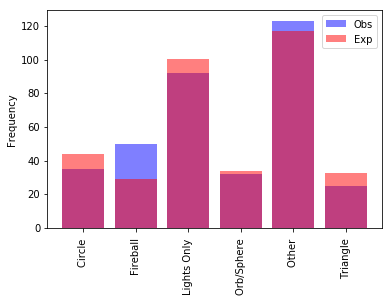

In [11]:
plt.bar(shapes,ca_counts,color='b',alpha=0.5)
plt.bar(shapes,ca_exp,color='r',alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.legend(['Obs','Exp'])
plt.show()

In [12]:
# doing the same with a built in python function
from scipy.stats import chisquare
statistic, pvalue = chisquare(f_obs=ca_counts, f_exp=ca_exp)
print(statistic, pvalue)

20.5159411342 0.000999594427938


### Interpreting the Results

The X<sup>2</sup> statistic is greater than X<sup>2</sup>-critical. So, we reject the null hypothesis and accept the alternative that the distribution of UFO shapes observed in CA is different than the global distribution of UFO shapes. In fact, the pvalue given by the python chisquare function is less than 0.001. So there is less than a 0.1% chance of a false positive in this case (type-1 error, erroneousy accepting the alternative hypothesis). 

### Chi-Square Test for Independence (or Homogeneity)

* H<sub>0</sub>: The distribution of UFO shapes in CA is no different than distribution in TX. Or, the distribution of UFO shapes is independent of the state (CA or TX).
* H<sub>A</sub>: The distribution of UFO shapes in CA is different than the distribution in TX. Or, the distribution of UFO shapes depends on the state (CA or TX).

The test statistic for this hypothesis test is

X<sup>2</sup> = SUM((expected - observed)^2/expected),

where the sum is over all r sub-groups and c different values of the categorical variable, there are (r-1)(c-1) degrees of freedom, and

expected<sub>rc</sub> = n<sub>r</sub>n<sub>c</sub>/n,

where n<sub>r</sub> is the total number of observations in sub-group r and n<sub>c</sub> is the total number of observations of category value c.

**What is the number of degrees of freedom and the X<sup>2</sup>-critical value for the data (&alpha; = 0.05)?**

[chi-square table](https://www.medcalc.org/manual/chi-square-table.php)

df = (r-1)(c-1) = (1)(5) = 5

X<sup>2</sup>-critical = 11.070

In [13]:
# are observed UFO shapes independed of the state CA vs TX?
nc = ca_counts+tx_counts
n = sum(nc)
ca_exp = sum(ca_counts)*nc/n
tx_exp = sum(tx_counts)*nc/n

x_square = sum(((ca_exp-ca_counts)**2)/ca_exp)+sum(((tx_exp-tx_counts)**2)/tx_exp)
print('X-square:', x_square)

obs = np.array([ca_counts, tx_counts])
statistic, pvalue, dof, exp = stats.chi2_contingency(obs)
print('statistics:', statistic, 'pvalue:', pvalue, 'dof:', dof)

X-square: 5.60280350541
statistics: 5.60280350541 pvalue: 0.346804732996 dof: 5


### Intepreting the Result
Since the X-square statistis is less than the critical value we accept the null hypothesis, the observed frequency of various UFO shapes is independent of the state being CA or TX.